# Displaying the tree of modeling parameter types

This notebook get a tree structure fo the modeling parameters currently available in NAT (as specified in data/modelingDictionary.csv) and a graph of it. 

In [1]:
#!pip3 install --upgrade ete3 --no-cache-dir --user

In [2]:
from ete3 import Tree, faces, TreeStyle

In [3]:
from nat.modelingParameter import ParameterTypeTree
tree = ParameterTypeTree.load()

In [4]:
def buildDisplayTree(tree, level = 0):
    
    displayTree = Tree(tree.value.name + ";" )
    displayTree.dist = 40
        
    for child in tree.children:
        displayTree.add_child(buildDisplayTree(child, level+1))
            
    return displayTree

displayTree = buildDisplayTree(tree)

In [5]:
def mylayout(node):
    descFace = faces.TextFace(node.name, fsize=30)
    descFace.margin_top = 10
    descFace.margin_bottom = 10
    descFace.border.margin = 1
    faces.add_face_to_node(descFace, node, column=0, aligned=False)
    node.img_style["size"] = 0


In [6]:
circular_style = TreeStyle()
circular_style.mode = "r" #"c" # draw tree in circular mode
circular_style.show_scale = False
circular_style.show_leaf_name = False
circular_style.layout_fn = mylayout    
circular_style.branch_vertical_margin = 2
    
displayTree.render("parameterTree.png", w=800,  tree_style=circular_style);

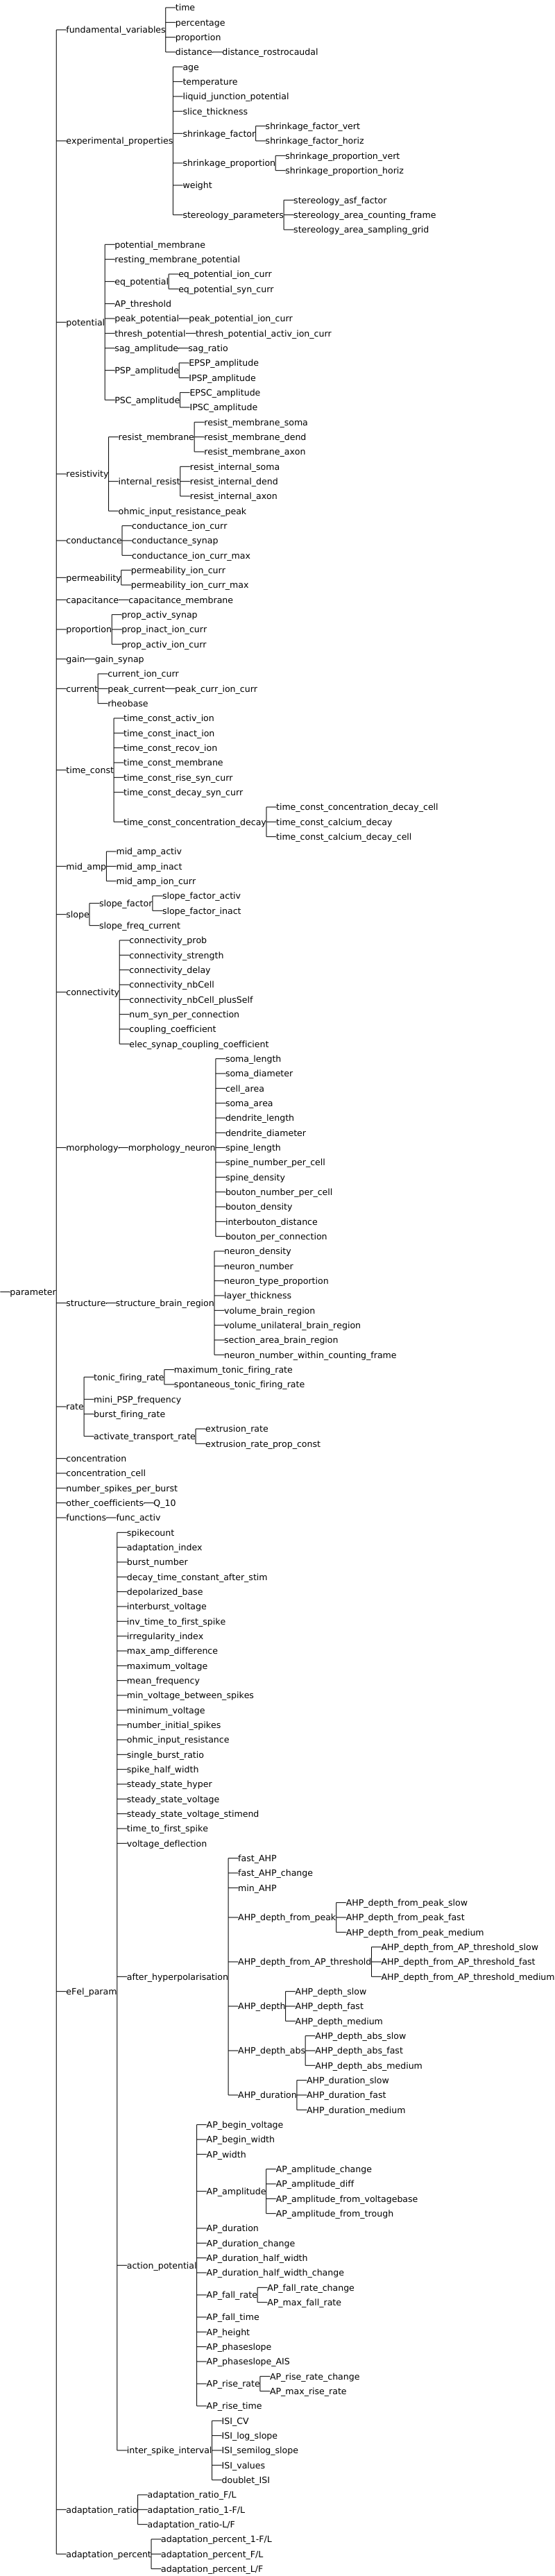

In [7]:
from IPython.display import Image
Image(filename='parameterTree.png')